In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [4]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


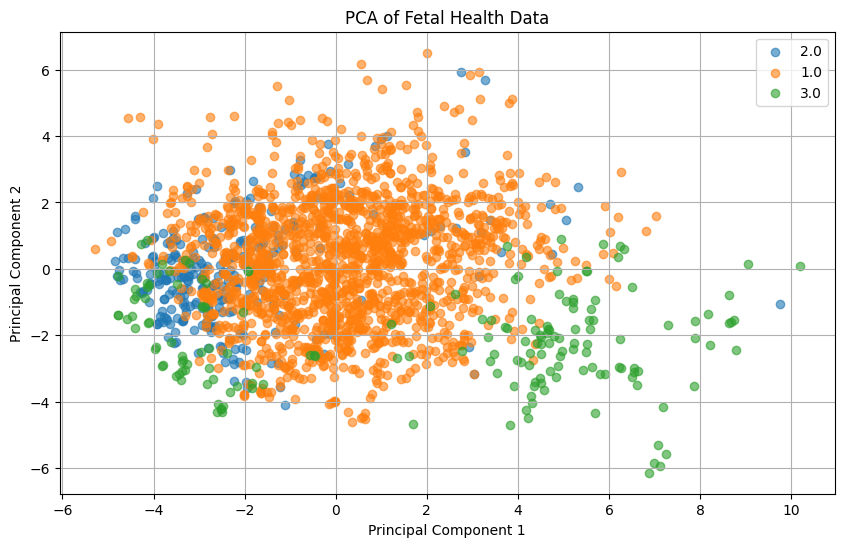

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('fetal_health', axis=1))

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['fetal_health'] = df['fetal_health']

# Plot the data
plt.figure(figsize=(10, 6))
for label in df_pca['fetal_health'].unique():
    subset = df_pca[df_pca['fetal_health'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fetal Health Data')
plt.legend()
plt.grid(True)
plt.show()


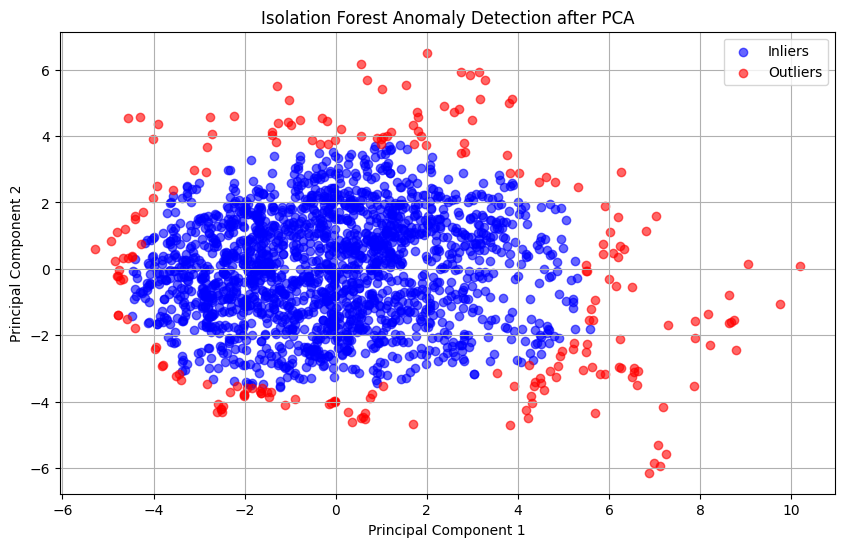

In [9]:
from sklearn.ensemble import IsolationForest

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('fetal_health', axis=1))

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['fetal_health'] = df['fetal_health']

isolation_forest = IsolationForest(contamination=0.1, random_state=42)

isolation_forest.fit(principal_components)

anomaly_preds = isolation_forest.predict(principal_components)

outliers_mask = anomaly_preds == -1

outliers = df_pca[outliers_mask]
inliers = df_pca[~outliers_mask]

plt.figure(figsize=(10, 6))

plt.scatter(inliers['PC1'], inliers['PC2'], label='Inliers', color='blue', alpha=0.6)

plt.scatter(outliers['PC1'], outliers['PC2'], label='Outliers', color='red', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Isolation Forest Anomaly Detection after PCA')
plt.legend()
plt.grid(True)
plt.show()